# Discourse Analysis

## Table of Contents
- [1st Section](#Loading-in-the-data) is where I import the files
- [2nd Section](#Discourse-exploration) is where I look at specific conversations
- [3rd section](#Conversations-between-genders) is where I import gender information per conversation
- [4th section](#Tokens-and-gender) is where I look at tokens per turn by gender
- [5th section](#Token-and-movie-decade) is where I factor in movie decade to look at change over time
- [Conclusion](#Conclusion) summarizes the notebook

## Loading in the data

In [1]:
# loading packages
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from scipy import stats

In [2]:
f1 = open('../analysis_notebooks/discourse_df.pkl', 'rb')
discourse_df = pickle.load(f1)
f1.close()

f2 = open('../dataframe_notebooks/conversations_intact_df.pkl', 'rb')
conversations_df = pickle.load(f2)
f2.close()

f3 = open('../dataframe_notebooks/characters_update_df.pkl', 'rb')
characters_df = pickle.load(f3)
f3.close()

## Discourse exploration

I will work with the `discourse_df` which has gender, turn, and conversation information. This will allow me to understand different aspects of the conversations.

In [3]:
discourse_df.head()

,conversation_ID,line_ID,character_ID,character_name,gender,movie_ID,movie_title,genres,movie_year,movie_decade,utterance,sents,tokens,sent_count,token_count,avg_sent_length
0,24,L1045,u0,BIANCA,F,m0,10 things i hate about you,"['comedy', 'romance']",1999,1990,They do not!,[They do not!],"[They, do, not, !]",1,4,4.000000
1,23,L985,u0,BIANCA,F,m0,10 things i hate about you,"['comedy', 'romance']",1999,1990,I hope so.,[I hope so.],"[I, hope, so, .]",1,4,4.000000
2,22,L925,u0,BIANCA,F,m0,10 things i hate about you,"['comedy', 'romance']",1999,1990,Let's go.,[Let's go.],"[Let, 's, go, .]",1,4,4.000000
3,21,L872,u0,BIANCA,F,m0,10 things i hate about you,"['comedy', 'romance']",1999,1990,Okay -- you're gonna need to learn how to lie.,[Okay -- you're gonna need to learn how to lie.],"[Okay, --, you, 're, gon, na, need, to, learn,...",1,13,13.000000
4,21,L870,u0,BIANCA,F,m0,10 things i hate about you,"['comedy', 'romance']",1999,1990,I'm kidding. You know how sometimes you just ...,"[I'm kidding., You know how sometimes you just...","[I, 'm, kidding, ., You, know, how, sometimes,...",3,25,8.333333


In [4]:
# what is the shortest conversation? 
discourse_df.groupby('conversation_ID').count().min()

line_ID            1
character_ID       1
character_name     1
gender             1
movie_ID           1
movie_title        1
genres             1
movie_year         1
movie_decade       1
utterance          1
sents              1
tokens             1
sent_count         1
token_count        1
avg_sent_length    1
dtype: int64

In [5]:
# how long is the average conversation?
discourse_df.groupby('conversation_ID').count().mean()

line_ID            3.664019
character_ID       3.664019
character_name     3.664019
gender             3.664019
movie_ID           3.664019
movie_title        3.664019
genres             3.664019
movie_year         3.664019
movie_decade       3.664019
utterance          3.664019
sents              3.664019
tokens             3.664019
sent_count         3.664019
token_count        3.664019
avg_sent_length    3.664019
dtype: float64

In [6]:
# what's the longest conversation?
discourse_df.groupby('conversation_ID').count().max()

line_ID            89
character_ID       89
character_name     89
gender             89
movie_ID           89
movie_title        89
genres             89
movie_year         89
movie_decade       89
utterance          89
sents              89
tokens             89
sent_count         89
token_count        89
avg_sent_length    89
dtype: int64

What does the longest conversation look like? What movie is it from and who are the characters involved? Based on exploration from the [Conversations_Notebook](../dataframe_notebooks/Conversations_Notebook.ipynb) I know that the `conversation_ID` for this 89-turn conversation is 42477.

In [7]:
discourse_df[discourse_df.conversation_ID==42477]

,conversation_ID,line_ID,character_ID,character_name,gender,movie_ID,movie_title,genres,movie_year,movie_decade,utterance,sents,tokens,sent_count,token_count,avg_sent_length
156153,42477,L135447,u4525,DANTE,M,m299,clerks.,['comedy'],1994,1990,What happened to the walk and the nakedness?,[What happened to the walk and the nakedness?],"[What, happened, to, the, walk, and, the, nake...",1,9,9.0
156154,42477,L135445,u4525,DANTE,M,m299,clerks.,['comedy'],1994,1990,Who doesn't?,[Who doesn't?],"[Who, does, n't, ?]",1,4,4.0
156155,42477,L135443,u4525,DANTE,M,m299,clerks.,['comedy'],1994,1990,"He went to rent a movie, but he hasn't gotten ...","[He went to rent a movie, but he hasn't gotten...","[He, went, to, rent, a, movie, ,, but, he, has...",2,33,16.5
156156,42477,L135441,u4525,DANTE,M,m299,clerks.,['comedy'],1994,1990,I'll ask Randal to close up for me when he get...,[I'll ask Randal to close up for me when he ge...,"[I, 'll, ask, Randal, to, close, up, for, me, ...",1,14,14.0
156157,42477,L135439,u4525,DANTE,M,m299,clerks.,['comedy'],1994,1990,I'm just kidding.,[I'm just kidding.],"[I, 'm, just, kidding, .]",1,5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156740,42477,L135368,u4522,CAITLIN,F,m299,clerks.,['comedy'],1994,1990,I was going to tell you. But then we were gett...,"[I was going to tell you., But then we were ge...","[I, was, going, to, tell, you, ., But, then, w...",2,25,12.5
156741,42477,L135366,u4522,CAITLIN,F,m299,clerks.,['comedy'],1994,1990,I'm not pregnant.,[I'm not pregnant.],"[I, 'm, not, pregnant, .]",1,5,5.0
156742,42477,L135364,u4522,CAITLIN,F,m299,clerks.,['comedy'],1994,1990,It's not what you think.,[It's not what you think.],"[It, 's, not, what, you, think, .]",1,7,7.0
156743,42477,L135362,u4522,CAITLIN,F,m299,clerks.,['comedy'],1994,1990,You saw it?,[You saw it?],"[You, saw, it, ?]",1,4,4.0


The conversation is from *Clerks* and is between Caitlin and Dante. What are the specifics of the conversation?

In [8]:
# how many turns does each character have?
discourse_df[discourse_df.conversation_ID==42477].groupby('gender')['line_ID'].count()

gender
F    45
M    44
Name: line_ID, dtype: int64

The lines are pretty much evenly split, so no one is dominating the conversation by taking more turns. Let's look at how many tokens each character has in this interaction.

In [9]:
# how many tokens per character?
discourse_df[discourse_df.conversation_ID==42477].groupby('gender')['token_count'].sum()

gender
F    922
M    532
Name: token_count, dtype: int64

Caitlin has almost twice as many tokens as Dante does in this conversation.

In [10]:
# what is the average token count per turn?
discourse_df[discourse_df.conversation_ID==42477].groupby('gender')['token_count'].mean()

gender
F    20.488889
M    12.090909
Name: token_count, dtype: float64

Based on the [Utterances_Notebook](../dataframe_notebooks/Utterances_Notebook.ipynb) I know that the mean token count is 13.74, so Dante is below the average by almost two tokens and Caitlin is above the average by almost seven tokens.

Let's see how these tokens compare to the rest of the corpus. 

In [11]:
# how does token count compare?
discourse_df.groupby('gender')['token_count'].mean()

gender
A          13.211688
F          13.115384
M          13.909054
unknown    14.701443
Name: token_count, dtype: float64

For the entire corpus unknown characters have the highest average token count per turn and female characters have the shortest. This conversation completely defies the norm for this corpus.

I will dive more into gender difference in the corpus in the "Tokens and gender" section below.

## Conversations between genders

The unexploded version of the conversations_df is the simplest way to compile this information.

In [12]:
# adding gender to the first character in the conversation
convo_gender_df = conversations_df.merge(characters_df, left_on='character1_ID', right_on='character_ID')

In [13]:
# adding gender to the second character in the conversation
convo_gender_df = convo_gender_df.merge(characters_df, left_on='character2_ID', right_on='character_ID')

In [14]:
# dropping columns and renaming the columns
convo_gender_df = convo_gender_df[['conversation_ID', 'character1_ID', 'gender_x', 'character2_ID', 'gender_y', 'movie_ID_x', 'dialogue']]
convo_gender_df.rename(columns={'movie_ID_x': 'movie_ID', 'gender_x': 'ch1_gender', 'gender_y': 'ch2_gender'}, inplace=True)

In [15]:
convo_gender_df.head()

,conversation_ID,character1_ID,ch1_gender,character2_ID,ch2_gender,movie_ID,dialogue
0,0,u0,F,u2,M,m0,"[L194, L195, L196, L197]"
1,1,u0,F,u2,M,m0,"[L198, L199]"
2,2,u0,F,u2,M,m0,"[L200, L201, L202, L203]"
3,3,u0,F,u2,M,m0,"[L204, L205, L206]"
4,4,u0,F,u2,M,m0,"[L207, L208]"


Possible gender pairings:

A - A<br>
F - F<br>
M - M<br>
U - U<br>
A - F<br>
A - M<br>
A - U<br>
F - M<br>
F - U<br>
M - U<br>

In [16]:
# function to return conversational gender pairs
def gender_pairs(a, b):
    if a == 'M' and b == 'F' or a == 'F' and b == 'M':
        return 'F:M'
    elif a == 'M' and b == 'A' or a == 'A' and b == 'M':
        return 'A:M'
    elif a == 'M' and b == 'unknown' or a == 'unknown' and b == 'M':
        return 'M:unknown'
    elif a == 'A' and b =='F' or a == 'F' and b =='A':
        return 'A:F'
    elif a == 'A' and b == 'unknown' or a == 'unknown' and b == 'A':
        return 'A:unknown'
    elif a == 'F' and b == 'unknown' or a == 'unknown' and b == 'F':
        return 'F:unknown'
    elif a == 'A' and b == 'A':
        return 'A:A'
    elif a == 'F' and b == 'F':
        return 'F:F'
    elif a == 'M' and b == 'M':
        return 'M:M'
    else:
        return 'unknown:unknown'    

In [17]:
# add column combining gender pairs
convo_gender_df['gender_pair'] = convo_gender_df.apply(lambda x: gender_pairs(a = x['ch1_gender'], b = x['ch2_gender']), axis=1)

In [18]:
# make sure that it works
convo_gender_df.head()

,conversation_ID,character1_ID,ch1_gender,character2_ID,ch2_gender,movie_ID,dialogue,gender_pair
0,0,u0,F,u2,M,m0,"[L194, L195, L196, L197]",F:M
1,1,u0,F,u2,M,m0,"[L198, L199]",F:M
2,2,u0,F,u2,M,m0,"[L200, L201, L202, L203]",F:M
3,3,u0,F,u2,M,m0,"[L204, L205, L206]",F:M
4,4,u0,F,u2,M,m0,"[L207, L208]",F:M


In [19]:
# how does the breakout look?
convo_gender_df.groupby('gender_pair').count()

,conversation_ID,character1_ID,ch1_gender,character2_ID,ch2_gender,movie_ID,dialogue
gender_pair,,,,,,,
A:A,185,185,185,185,185,185,185
A:F,1057,1057,1057,1057,1057,1057,1057
A:M,3362,3362,3362,3362,3362,3362,3362
A:unknown,481,481,481,481,481,481,481
F:F,4601,4601,4601,4601,4601,4601,4601
F:M,31459,31459,31459,31459,31459,31459,31459
F:unknown,2370,2370,2370,2370,2370,2370,2370
M:M,29065,29065,29065,29065,29065,29065,29065
M:unknown,8886,8886,8886,8886,8886,8886,8886


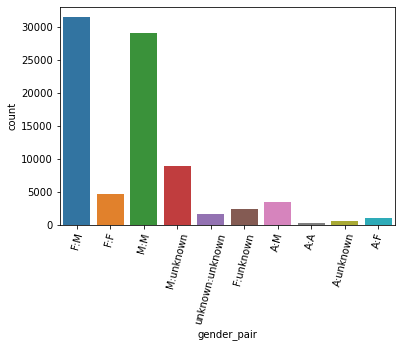

In [20]:
# visualizing it is easier
sns.countplot(x = "gender_pair",
             data = convo_gender_df)
plt.xticks(rotation=75)
plt.savefig('../data_visualization/gender_pair_dialogue.png')
plt.show()

Male-female conversations are the most common dialogue pair, followed closely by male-male. This makes sense because there are more male characters in the movies overall.

## Tokens and gender

I will look at token counts to see if there is a difference between turns by gender.

In [21]:
discourse_df.groupby('gender').agg({'token_count': ['sum', 'mean', 'min', 'max', 'std']})

token_count                               
                sum       mean min  max        std
gender                                            
A            120266  13.211688   1  225  13.406066
F           1085298  13.115384   1  368  13.639057
M           2616140  13.909054   1  684  15.170149
unknown      359612  14.701443   1  337  15.014589

Characters with unknown gender markers have the longest turns at 14.7. Female characters have the shortest tokens per turn. Female and ambiguous characters fall below the overall token mean of 13.74 and male and unknown are above the mean. The longest turn is from a male character. 

Raw count doesn't help for comparison across categories, but by looking at this we can see that there are more male characters because the average token count above does not differ as much as the raw counts.

Characters across all gender markers have utterances that are only one token long. I expect these will be interjections of some kind.

In [22]:
discourse_df[discourse_df.token_count==1]

,conversation_ID,line_ID,character_ID,character_name,gender,movie_ID,movie_title,genres,movie_year,movie_decade,utterance,sents,tokens,sent_count,token_count,avg_sent_length
10,17,L698,u0,BIANCA,F,m0,10 things i hate about you,"['comedy', 'romance']",1999,1990,But,[But],[But],1,1,1.0
13,15,L663,u0,BIANCA,F,m0,10 things i hate about you,"['comedy', 'romance']",1999,1990,Tons,[Tons],[Tons],1,1,1.0
61,50,L904,u0,BIANCA,F,m0,10 things i hate about you,"['comedy', 'romance']",1999,1990,But,[But],[But],1,1,1.0
100,22,L924,u2,CAMERON,M,m0,10 things i hate about you,"['comedy', 'romance']",1999,1990,Wow,[Wow],[Wow],1,1,1.0
101,21,L871,u2,CAMERON,M,m0,10 things i hate about you,"['comedy', 'romance']",1999,1990,No,[No],[No],1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298231,81206,L646110,u8846,CHINA,unknown,m600,waxwork,"['comedy', 'fantasy', 'horror']",1988,1980,Yeah,[Yeah],[Yeah],1,1,1.0
298292,81231,L646365,u8851,MARK,M,m600,waxwork,"['comedy', 'fantasy', 'horror']",1988,1980,China,[China],[China],1,1,1.0
298325,81213,L646309,u8853,MR LINCOLN,M,m600,waxwork,"['comedy', 'fantasy', 'horror']",1988,1980,Hi,[Hi],[Hi],1,1,1.0
301982,82387,L659811,u8950,DOROTHY,F,m610,the wizard of oz,"['adventure', 'family', 'fantasy', 'musical']",1939,1930,Oh-oh-,[Oh-oh-],[Oh-oh-],1,1,1.0


At quick glance, some answers, greetings, and interjections.

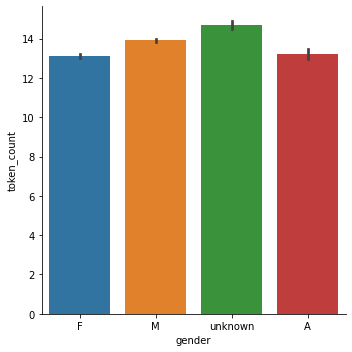

In [23]:
# let's visualize the difference between token counts
sns.catplot(data=discourse_df, x='gender', y='token_count', kind='bar')
plt.savefig('../data_visualization/gender_token.png')
plt.show()

In [24]:
# is there a statistically significant difference between this variance?
stats.f_oneway(discourse_df[discourse_df.gender=='F'].token_count, discourse_df[discourse_df.gender=='M'].token_count, discourse_df[discourse_df.gender=='unknown'].token_count, discourse_df[discourse_df.gender=='A'].token_count)

F_onewayResult(statistic=96.80918038167995, pvalue=1.2568045316489117e-62)

The difference between average token count is significant at p ≤ 0.05.

## Token and movie decade

I will factor in movie decade to see if any differences can be detected across time.

In [25]:
# what is the average token count by decade and gender?
discourse_df.groupby(['movie_decade','gender']).token_count.mean()

movie_decade  gender 
1920          A          10.882353
              F           6.137931
              M          10.054054
              unknown     8.714286
1930          A          10.429487
              F          13.953283
              M          15.468050
              unknown    15.525862
1940          A          15.484076
              F          15.083987
              M          15.317989
              unknown    14.523220
1950          A          13.398305
              F          14.269518
              M          13.995191
              unknown    13.518856
1960          A          16.606557
              F          12.064139
              M          14.054879
              unknown    14.871824
1970          A          12.406340
              F          12.909269
              M          13.892245
              unknown    15.359916
1980          A          12.722094
              F          12.216716
              M          13.121848
              unknown    14.18500

/opt/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/opt/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/opt/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/opt/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]


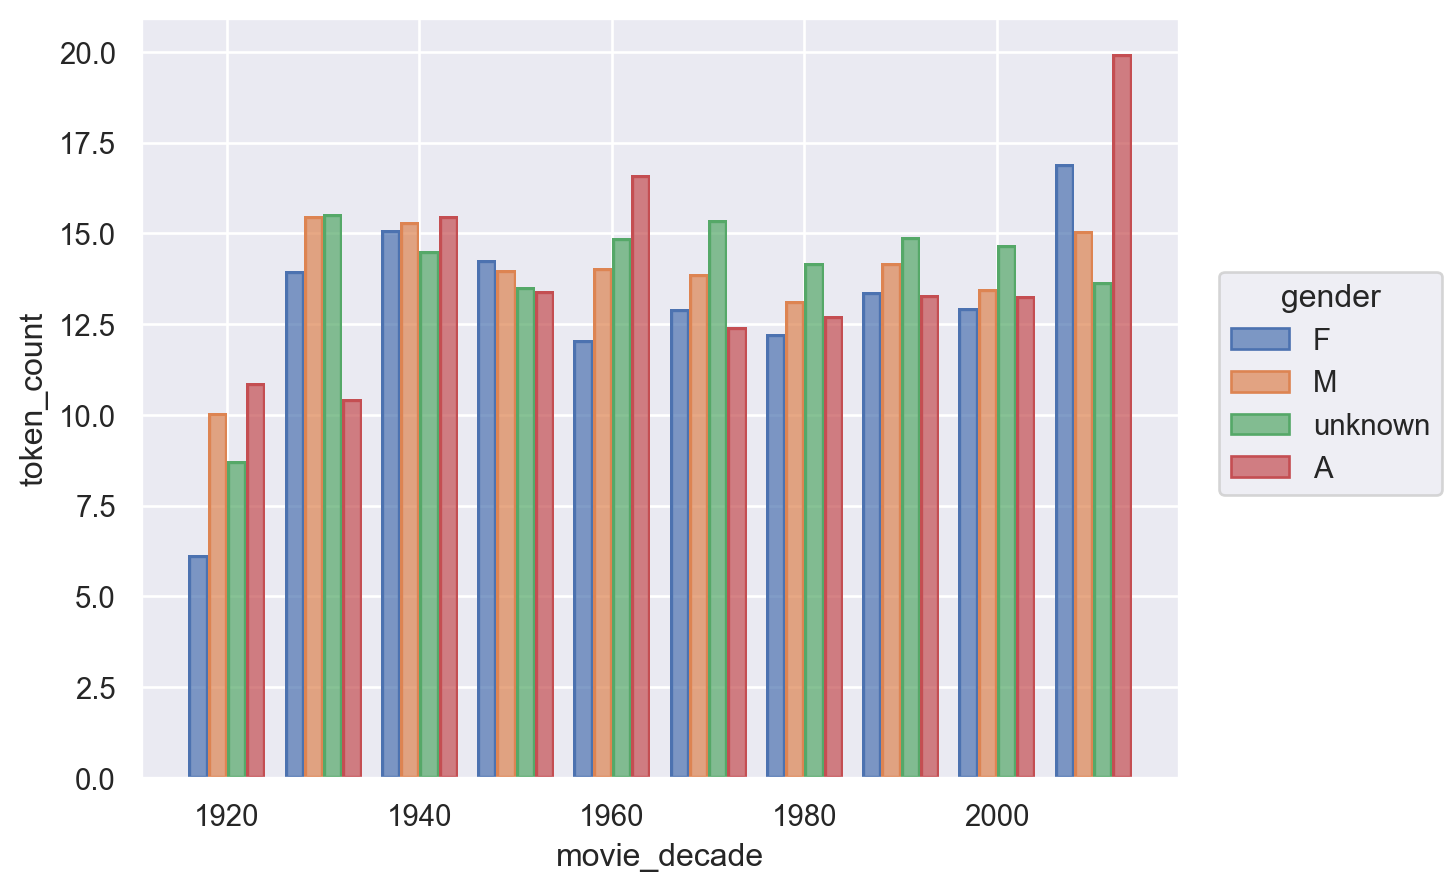

In [26]:
# visualizing it is easier
so.Plot(discourse_df, "movie_decade", "token_count").add(so.Bar(), so.Agg(), so.Dodge(), color="gender").save('../data_visualization/gender_token_mean_decade.png')

Female characters have the longest average turn two decades in the corpus. Comparatively, male characters have the longest average turn for seven of the decades. Unknown has the longest average turn in the remaining decade.

There is no discernable trend regarding average turns by gender and decade, but the turns do get longer over time.

In [27]:
# what is the max token count by decade and gender?
discourse_df.groupby(['movie_decade','gender']).token_count.max()

movie_decade  gender 
1920          A           33
              F           20
              M          165
              unknown     39
1930          A           91
              F          160
              M          227
              unknown    337
1940          A          146
              F          229
              M          358
              unknown    118
1950          A           77
              F          317
              M          247
              unknown    120
1960          A          126
              F          238
              M          366
              unknown    118
1970          A           93
              F          239
              M          253
              unknown    208
1980          A          197
              F          368
              M          266
              unknown    173
1990          A          159
              F          243
              M          684
              unknown    243
2000          A          225
              F      

/opt/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/opt/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/opt/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/opt/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]


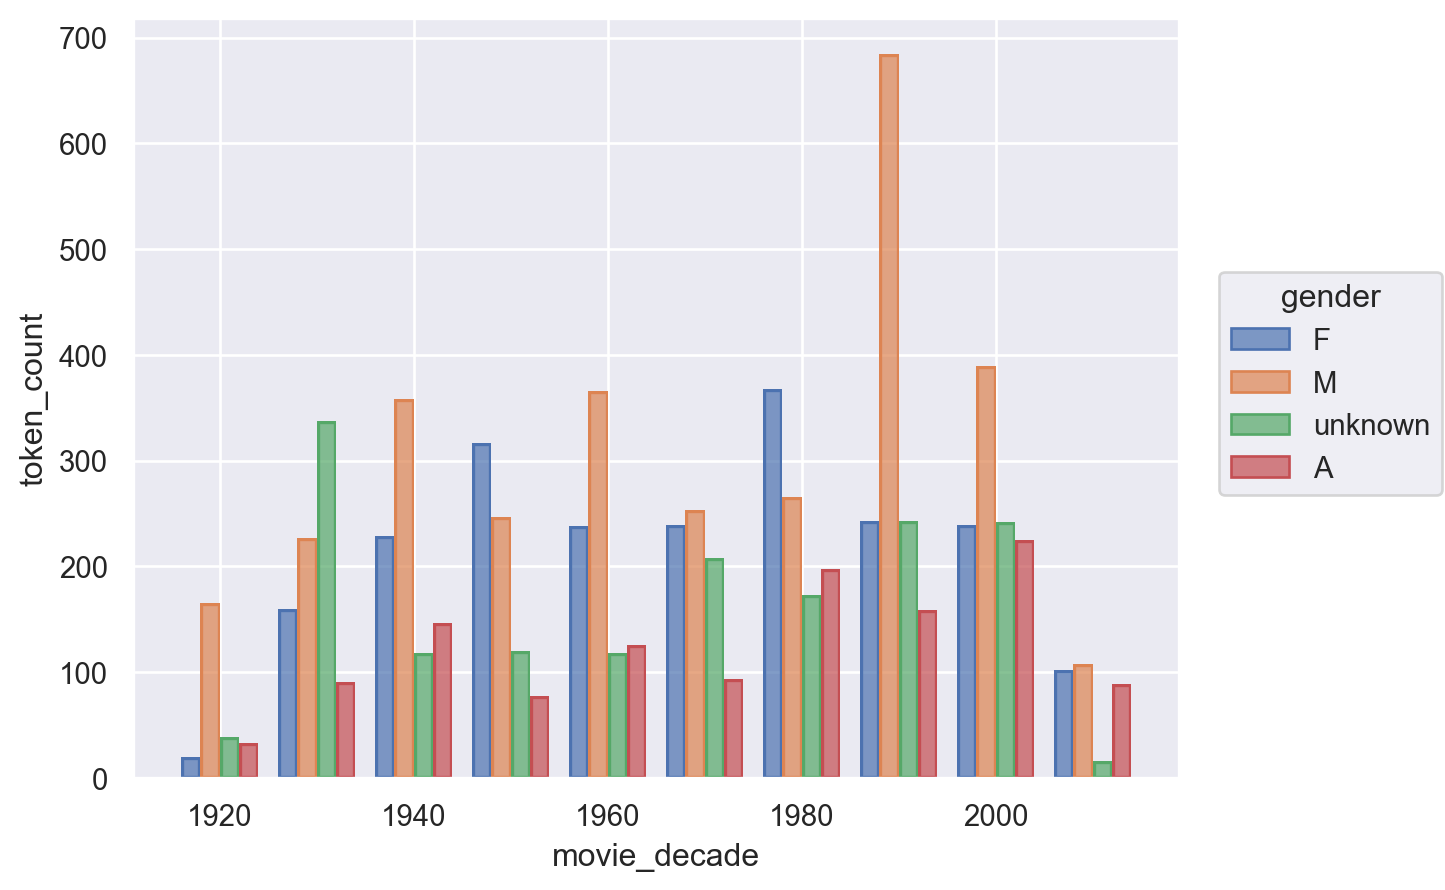

In [28]:
# and visualize it
so.Plot(discourse_df, "movie_decade", "token_count").add(so.Bar(), so.Agg('max'), so.Dodge(), color="gender").save('../data_visualization/gender_token_max_decade.png')

Male characters have the highest number of tokens per turn for seven of the ten decades. Based on this, male characters tend to dominate conversations more than any other gender.

Let's filter down to one gender at a time.

### Female token decade

In [29]:
# what do female token counts look like by decade?
discourse_df[discourse_df.gender=='F'].groupby('movie_decade').agg({'token_count': ['mean', 'min', 'max']})

token_count         
                    mean min  max
movie_decade                     
1920            6.137931   2   20
1930           13.953283   1  160
1940           15.083987   1  229
1950           14.269518   1  317
1960           12.064139   1  238
1970           12.909269   1  239
1980           12.216716   1  368
1990           13.379428   1  243
2000           12.933671   1  239
2010           16.915789   2  102

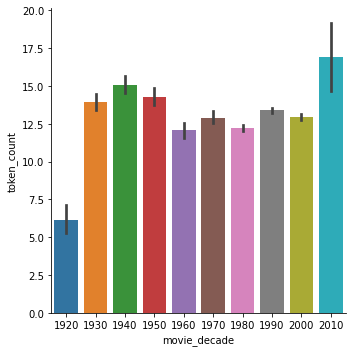

In [30]:
# what does that look visually?
sns.catplot(data=discourse_df[discourse_df.gender=='F'], x='movie_decade', y='token_count', kind='bar')
plt.savefig('../data_visualization/female_token_decade.png')
plt.show()

In [31]:
# is there a statistically significant difference between this variance?
stats.f_oneway(discourse_df[(discourse_df.gender=='F') & (discourse_df.movie_decade==1920)].token_count, 
               discourse_df[(discourse_df.gender=='F') & (discourse_df.movie_decade==1930)].token_count,
               discourse_df[(discourse_df.gender=='F') & (discourse_df.movie_decade==1940)].token_count,
               discourse_df[(discourse_df.gender=='F') & (discourse_df.movie_decade==1950)].token_count,
               discourse_df[(discourse_df.gender=='F') & (discourse_df.movie_decade==1960)].token_count,
               discourse_df[(discourse_df.gender=='F') & (discourse_df.movie_decade==1970)].token_count,
               discourse_df[(discourse_df.gender=='F') & (discourse_df.movie_decade==1980)].token_count,
               discourse_df[(discourse_df.gender=='F') & (discourse_df.movie_decade==1990)].token_count,
               discourse_df[(discourse_df.gender=='F') & (discourse_df.movie_decade==2000)].token_count,
               discourse_df[(discourse_df.gender=='F') & (discourse_df.movie_decade==2010)].token_count)

F_onewayResult(statistic=23.323920695243288, pvalue=3.118315263502376e-40)

This variation is significant at p ≤ 0.05.

### Male token decade

In [32]:
# what do male token counts look like by decade?
discourse_df[discourse_df.gender=='M'].groupby('movie_decade').agg({'token_count': ['mean', 'min', 'max']})

token_count         
                    mean min  max
movie_decade                     
1920           10.054054   2  165
1930           15.468050   1  227
1940           15.317989   1  358
1950           13.995191   2  247
1960           14.054879   2  366
1970           13.892245   1  253
1980           13.121848   1  266
1990           14.192997   1  684
2000           13.472382   1  389
2010           15.073826   2  108

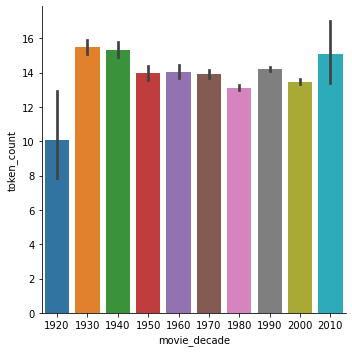

In [33]:
# what does that look visually?
sns.catplot(data=discourse_df[discourse_df.gender=='M'], x='movie_decade', y='token_count', kind='bar')
plt.savefig('../data_visualization/male_token_decade.png')
plt.show()

In [34]:
# is there a statistically significant difference between this variance?
stats.f_oneway(discourse_df[(discourse_df.gender=='M') & (discourse_df.movie_decade==1920)].token_count, 
               discourse_df[(discourse_df.gender=='M') & (discourse_df.movie_decade==1930)].token_count,
               discourse_df[(discourse_df.gender=='M') & (discourse_df.movie_decade==1940)].token_count,
               discourse_df[(discourse_df.gender=='M') & (discourse_df.movie_decade==1950)].token_count,
               discourse_df[(discourse_df.gender=='M') & (discourse_df.movie_decade==1960)].token_count,
               discourse_df[(discourse_df.gender=='M') & (discourse_df.movie_decade==1970)].token_count,
               discourse_df[(discourse_df.gender=='M') & (discourse_df.movie_decade==1980)].token_count,
               discourse_df[(discourse_df.gender=='M') & (discourse_df.movie_decade==1990)].token_count,
               discourse_df[(discourse_df.gender=='M') & (discourse_df.movie_decade==2000)].token_count,
               discourse_df[(discourse_df.gender=='M') & (discourse_df.movie_decade==2010)].token_count)

F_onewayResult(statistic=28.267736794187584, pvalue=1.267942650831952e-49)

This variation is significant at p ≤ 0.05.

### Unknown token decade

In [35]:
# what do unknown token counts look like by decade?
discourse_df[discourse_df.gender=='unknown'].groupby('movie_decade').agg({'token_count': ['mean', 'min', 'max']})

token_count         
                    mean min  max
movie_decade                     
1920            8.714286   2   39
1930           15.525862   1  337
1940           14.523220   1  118
1950           13.518856   2  120
1960           14.871824   1  118
1970           15.359916   1  208
1980           14.185000   1  173
1990           14.895010   1  243
2000           14.676616   2  242
2010           13.666667  10   16

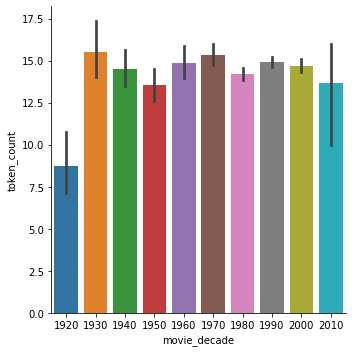

In [36]:
# what does that look visually?
sns.catplot(data=discourse_df[discourse_df.gender=='unknown'], x='movie_decade', y='token_count', kind='bar')
plt.savefig('../data_visualization/unknown_token_decade.png')
plt.show()

In [37]:
# is there a statistically significant difference between this variance?
stats.f_oneway(discourse_df[(discourse_df.gender=='unknown') & (discourse_df.movie_decade==1920)].token_count, 
               discourse_df[(discourse_df.gender=='unknown') & (discourse_df.movie_decade==1930)].token_count,
               discourse_df[(discourse_df.gender=='unknown') & (discourse_df.movie_decade==1940)].token_count,
               discourse_df[(discourse_df.gender=='unknown') & (discourse_df.movie_decade==1950)].token_count,
               discourse_df[(discourse_df.gender=='unknown') & (discourse_df.movie_decade==1960)].token_count,
               discourse_df[(discourse_df.gender=='unknown') & (discourse_df.movie_decade==1970)].token_count,
               discourse_df[(discourse_df.gender=='unknown') & (discourse_df.movie_decade==1980)].token_count,
               discourse_df[(discourse_df.gender=='unknown') & (discourse_df.movie_decade==1990)].token_count,
               discourse_df[(discourse_df.gender=='unknown') & (discourse_df.movie_decade==2000)].token_count,
               discourse_df[(discourse_df.gender=='unknown') & (discourse_df.movie_decade==2010)].token_count)

F_onewayResult(statistic=3.146118731542804, pvalue=0.0008488480238859613)

This variation is significant at p ≤ 0.05.

### Ambiguous token decade

In [38]:
# what do ambiguous token counts look like by decade?
discourse_df[discourse_df.gender=='A'].groupby('movie_decade').agg({'token_count': ['mean', 'min', 'max']})

token_count         
                    mean min  max
movie_decade                     
1920           10.882353   2   33
1930           10.429487   2   91
1940           15.484076   2  146
1950           13.398305   2   77
1960           16.606557   2  126
1970           12.406340   1   93
1980           12.722094   1  197
1990           13.289806   2  159
2000           13.271791   2  225
2010           19.925926   2   89

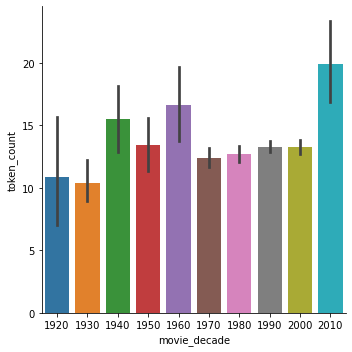

In [39]:
# what does that look visually?
sns.catplot(data=discourse_df[discourse_df.gender=='A'], x='movie_decade', y='token_count', kind='bar')
plt.savefig('../data_visualization/ambiguous_token_decade.png')
plt.show()

In [40]:
# is there a statistically significant difference between this variance?
stats.f_oneway(discourse_df[(discourse_df.gender=='A') & (discourse_df.movie_decade==1920)].token_count, 
               discourse_df[(discourse_df.gender=='A') & (discourse_df.movie_decade==1930)].token_count,
               discourse_df[(discourse_df.gender=='A') & (discourse_df.movie_decade==1940)].token_count,
               discourse_df[(discourse_df.gender=='A') & (discourse_df.movie_decade==1950)].token_count,
               discourse_df[(discourse_df.gender=='A') & (discourse_df.movie_decade==1960)].token_count,
               discourse_df[(discourse_df.gender=='A') & (discourse_df.movie_decade==1970)].token_count,
               discourse_df[(discourse_df.gender=='A') & (discourse_df.movie_decade==1980)].token_count,
               discourse_df[(discourse_df.gender=='A') & (discourse_df.movie_decade==1990)].token_count,
               discourse_df[(discourse_df.gender=='A') & (discourse_df.movie_decade==2000)].token_count,
               discourse_df[(discourse_df.gender=='A') & (discourse_df.movie_decade==2010)].token_count)

F_onewayResult(statistic=5.843487618680486, pvalue=3.6992833676113645e-08)

This variation is significant at p ≤ 0.05.

## Conclusion

There is significant difference at p ≤ 0.05 for average token count by gender. This significance difference is found for all movie decades as well. All genders also have longer average turns by 2010 compared to the beginning of the corpus.

Conversations between a male and a female character are the most common out of the corpus, followed by male-male conversations.

The longest conversation has 89 turns that are evenly split between the male and female speaker. However Caitlin has almost twice as many tokens as Dante.